<h1>Transformation des données et réalisation d'un clustering</h1>
<h2>Transformation des données</h2>
Les données sont organisées avec chaque mutation dans chaque lignée cellulaire par ligne.
On les transforme pour avoir en colonne les genes concernés par des mutations et en ligne chaque lignée
Si une mutation quelle qu'elle soit est présente dans un gene dans une lignée alors je donne la valeur 1
Au contraire s'il n'y a aucune mutation décrite dans les données, j'attribue un 0
un second dataframe représente les abbération cytogénétique par lignée cellulaire
<h2>Clustering</h2>
La réduction du nombre de mutation prises en compte reste effective et on ajoute les données de cytogénétique (voir cluster_mutations.ipynb)

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [15]:
f=open("/home/buffard/Seafile/data/table_S4_mutations.csv","r")
f.readline()
cell_lines={}
genes=set()
for line in f:
    column=line.split(";")
    if column[0] in cell_lines:
        cell_lines[column[0]].append(column[1])
    else:
        cell_lines.update({column[0]:[column[1]]})
    genes.add(column[1])
f.close()

g=open("/home/buffard/code/Cluster_mutations/cell_lines_mutations_matrix.csv","w")
g.write("samples;")
for gene in genes:
    g.write(gene+";")
g.write("\n")

names=np.array([])
print (len(genes))

Y=list()
for cell_line in cell_lines.keys():
    g.write(cell_line+";")
    X=[]
    
    names=np.append(names,cell_line)
    for gene in genes:
        if gene in cell_lines[cell_line]:
            g.write("1;")
            X.append(1)
        else:
            g.write("0;")
            X.append(0)
    
    g.write("\n")
    Y.append(X)

g.close()

matrix=np.array(Y)
df= pd.DataFrame(matrix, index=cell_lines.keys(),columns=list(genes))

    

236


In [16]:
count_mutation=df.sum(axis=1)
print(count_mutation)

df2=df.assign(count=df.sum(axis=1))




AMO1     20
L363     18
Lopra    13
LP1      14
MM1S     22
MOLP2    20
MOLP8    25
OPM2     28
RPMI     23
SKMM2    16
XG1       8
XG11     16
JJN3     13
XG12     12
XG13     23
XG16      8
XG19     17
XG2      15
XG20     18
XG23     17
XG24     21
XG25     19
XG26     12
XG27     12
XG28     11
XG29     11
XG30     18
XG5      14
XG6      29
XG7      17
dtype: int64


In [17]:
count_mutation=df.sum(axis=0)

df3=pd.DataFrame(count_mutation,columns=["occurence"])

print(df3.nsmallest(4, 'occurence',keep='all'))


        occurence
FIP1L1          1
PHOX2B          1
BTK             1
EZR             1
CDH11           1
...           ...
SF3B1           1
PIK3CB          1
HEY1            1
IKBKB           1
MLH1            1

[126 rows x 1 columns]


126 genes mutés dans une seule lignée

Supression des mutations qui ne sont présentes dans plus de occurence_number lignées

In [18]:
#list of unique occurence mutations
occurence_number=5

df_reduced=df.drop(df3[df3["occurence"] <=occurence_number].index,axis=1)


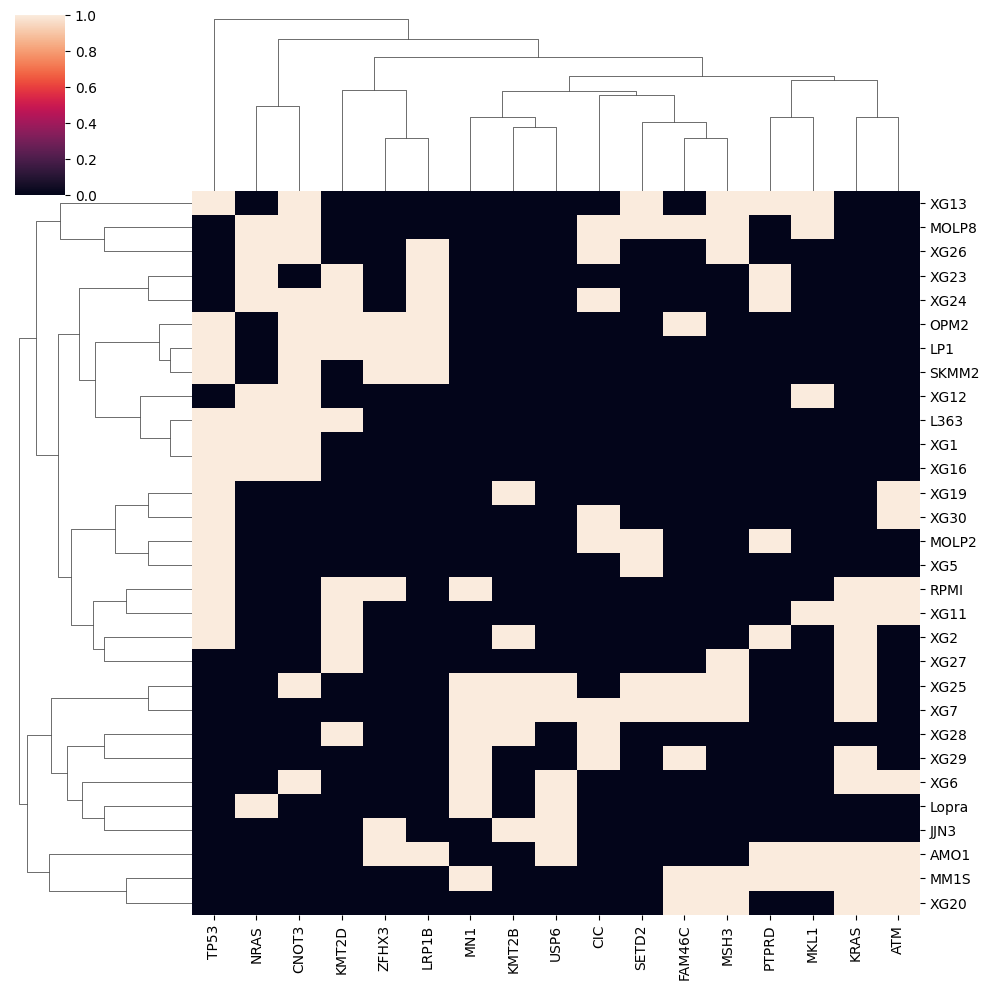

In [19]:
hierachic_cluster=sns.clustermap(df_reduced,xticklabels=True,metric='hamming',col_cluster=True)
for tickLabel in hierachic_cluster.ax_heatmap.get_xticklabels():
  tickLabel.set_fontsize(10)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering_reduced-"+str(occurence_number)+"_hamming.png") 


save file with genes selected

In [20]:
print(df_reduced.columns)
f=open("list_gene_reduced_"+str(occurence_number)+".tsv","w")
for gene in df_reduced.columns:
    f.write(gene+"\t")
f.close()

Index(['CIC', 'NRAS', 'FAM46C', 'TP53', 'MSH3', 'ZFHX3', 'KMT2B', 'LRP1B',
       'KMT2D', 'SETD2', 'KRAS', 'ATM', 'USP6', 'PTPRD', 'MN1', 'CNOT3',
       'MKL1'],
      dtype='object')


<h1>Load cytogenetic aberrations</h1>

In [21]:
cytogenetic_df=pd.read_csv("cytogenetic_aberration.csv",sep="\t")

cytogenetic_df.set_index("cell_lines", inplace=True)
print(cytogenetic_df)

            del1p  1qgain  del13q  del17p  t(4;14)  t(14;16)  t(11;14)  \
cell_lines                                                               
LP1             1       1       1       0        1         0         0   
OPM2            1       1       1       1        1         0         0   
SKMM2           1       0       1       1        0         0         1   
XG26            1       0       1       0        1         0         0   
XG23            0       0       0       0        0         0         1   
XG24            0       0       0       0        1         0         0   
L363            0       0       0       1        0         0         0   
XG1             0       0       1       0        0         0         1   
XG16            1       1       1       1        0         0         0   
XG12            1       0       0       0        0         1         0   
XG13            1       0       1       1        0         1         0   
XG25            1       1       1     

merge mutations and cytogenic abberration data

In [22]:
Complete_df=pd.merge(cytogenetic_df,df_reduced,right_index=True,left_index=True)
#Complete_df.set_index("key_0", inplace=True)
print(Complete_df)

       del1p  1qgain  del13q  del17p  t(4;14)  t(14;16)  t(11;14)  t(12;14)  \
LP1        1       1       1       0        1         0         0         0   
OPM2       1       1       1       1        1         0         0         0   
SKMM2      1       0       1       1        0         0         1         0   
XG26       1       0       1       0        1         0         0         0   
XG23       0       0       0       0        0         0         1         0   
XG24       0       0       0       0        1         0         0         0   
L363       0       0       0       1        0         0         0         0   
XG1        0       0       1       0        0         0         1         0   
XG16       1       1       1       1        0         0         0         0   
XG12       1       0       0       0        0         1         0         0   
XG13       1       0       1       1        0         1         0         0   
XG25       1       1       1       0        0       

<h1>Hierachical clustering with mutations and cytogenetic aberration</h1>

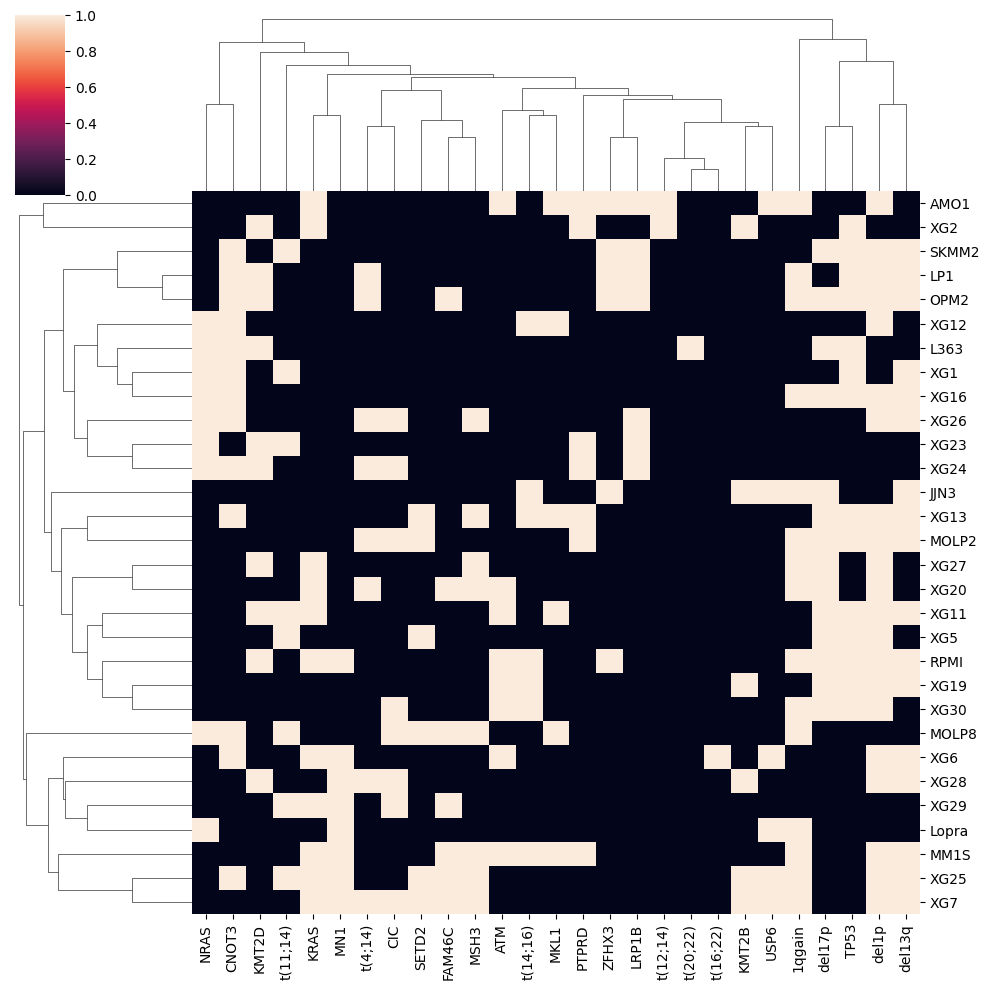

In [23]:
hierachic_cluster=sns.clustermap(Complete_df,xticklabels=True,metric='hamming',col_cluster=True)
for tickLabel in hierachic_cluster.ax_heatmap.get_xticklabels():
  tickLabel.set_fontsize(10)
fig=hierachic_cluster.fig
fig.savefig("hierarchical_clutering_reduced-"+str(occurence_number)+"_hamming_cytogenetic.png") 
